# Machine learning algorithms for classification and regression on iris in Python

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np


# Convert 'iris.data' numpy array to 'iris.dataframe' pandas dataframe
# complete the iris dataset by adding species
iris = datasets.load_iris()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


## 1. splitting the dataset into training and test sets

In [65]:
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
class_names = iris.iloc[:, 5]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size = 0.7)

# reconstruction of the training and testing datasets
training_df = pd.DataFrame(data = np.column_stack((X_train,y_train)), 
                           index = X_train.index, 
                           columns = iris.columns[iris.columns!= 'species'] )

testing_df = pd.DataFrame(data = np.column_stack((X_test,y_test)), 
                           index = X_test.index, 
                           columns = iris.columns[iris.columns!= 'species'] )

## 2. Saving a copy of the different datasets in .csv files

In [68]:
# 2. save entire dataset, training and testing datasets
# save a copy of the dataset in .csv
iris.to_csv('C:/Users/julia/OneDrive/Desktop/github/24. Machine learning toolbox Python/iris.csv', index=False)

training_df.to_csv('C:/Users/julia/OneDrive/Desktop/github/24. Machine learning toolbox Python/iris_training.csv',
          index = False)

testing_df.to_csv('C:/Users/julia/OneDrive/Desktop/github/24. Machine learning toolbox Python/iris_testing.csv',
          index = False)

## 3. Visualization

<Figure size 800x300 with 0 Axes>

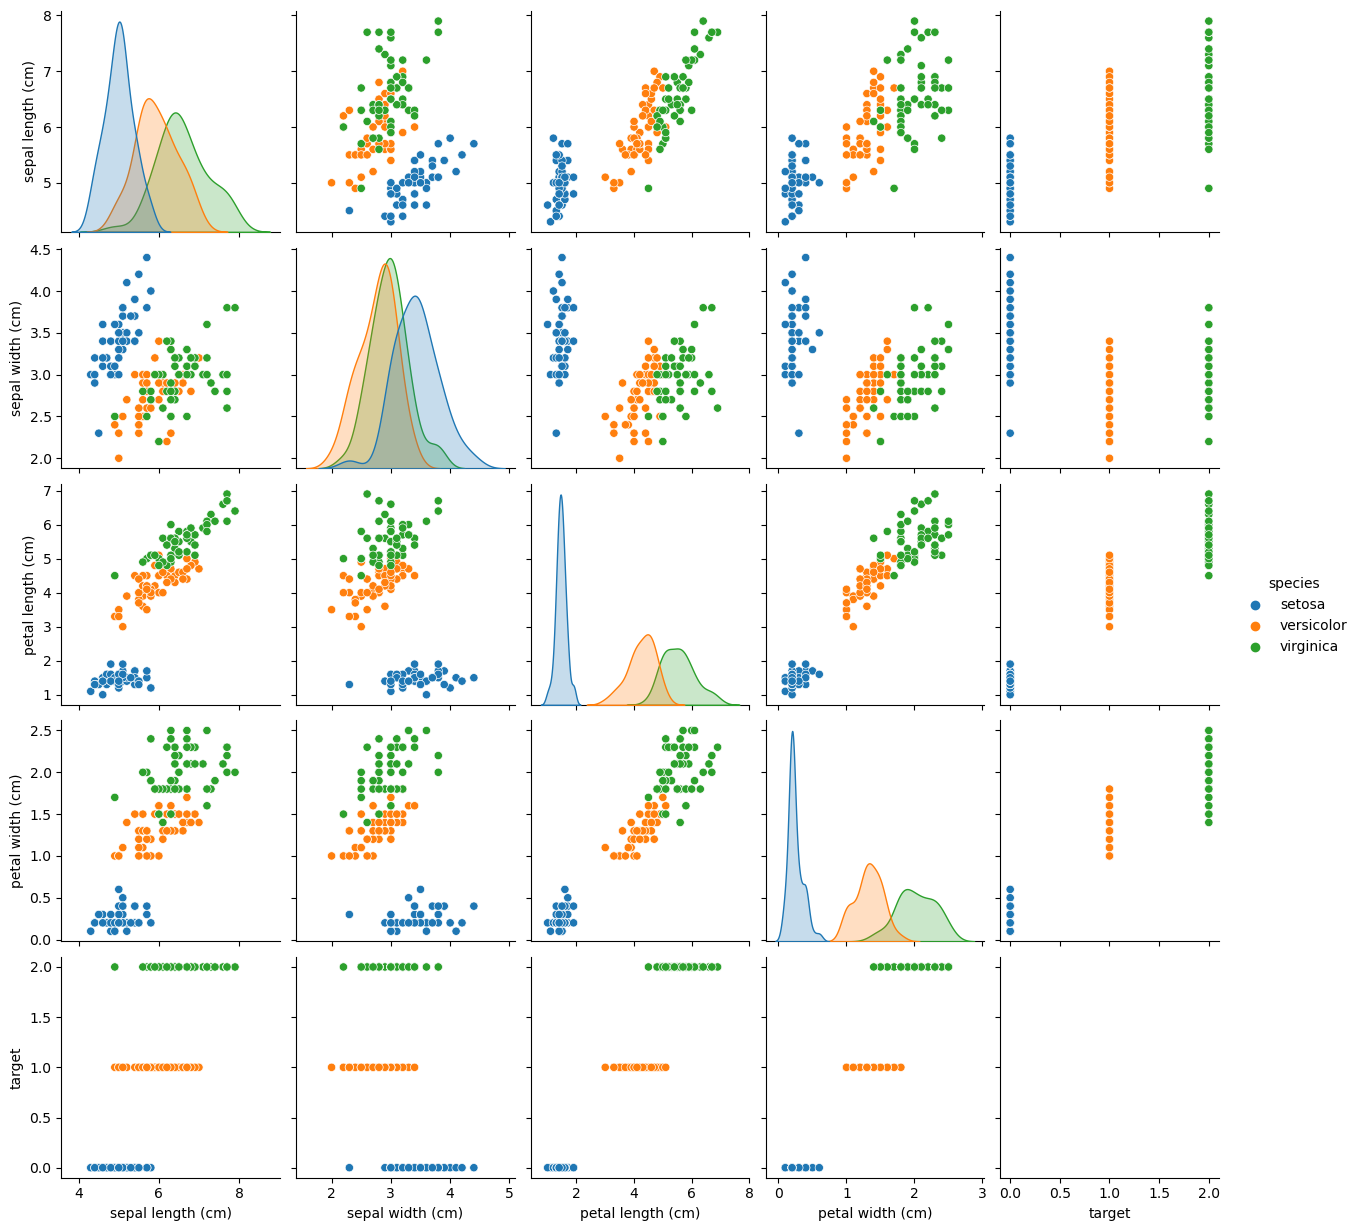

In [69]:
plt.figure(figsize=(8,3))
sns.pairplot(iris, hue='species')
plt.show()

# 1. Naive Bayes classifier

### 1.1 train the model

In [70]:
from sklearn.naive_bayes import GaussianNB

# create a Gaussian RF classifier
nb_model = GaussianNB()

# fit the model to the iris dataset
nb_model.fit(X_train,y_train)

# make predictions on test set
y_pred_nb = nb_model.predict(X_test)

### 1.2 Confusion matrix

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained NB classifier on the testing set.

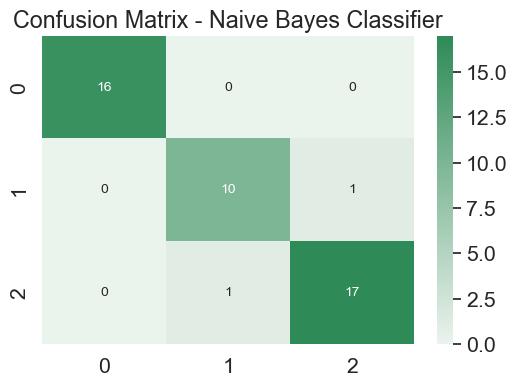

In [71]:
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb

df_cm_nb = pd.DataFrame(cm_nb, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_nb, annot=True, annot_kws={"size": 10}, cmap = sns.light_palette("seagreen", as_cmap=True)) # font size
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

### 1.3 Accuracy of the Naive Bayes classifier

In [76]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

accuracy_test_nb = round(accuracy_score(y_test, y_pred_nb)* 100, 2)
accuracy_train_nb = round(nb_model.score(X_train, y_train)* 100, 2)
precision_nb = round(precision_score(y_test, y_pred_nb,average = 'micro')* 100, 2)
recall_nb =  round(recall_score(y_test, y_pred_nb, average = 'micro')* 100, 2)
f1_nb = round(f1_score(y_test,y_pred_nb,average = 'micro')* 100, 2)

print("Accuracy testing: %.3f"  % accuracy_test_nb)
print("Accuracy training: %.3f" % accuracy_train_nb)
print('precision_NB : %.3f' %precision_nb)
print('recall_NB: %.3f' %recall_nb)
print('f1-score_NB : %.3f' %f1_nb)

Accuracy testing: 95.560
Accuracy training: 95.240
precision_NB : 95.560
recall_NB: 95.560
f1-score_NB : 95.560


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91      0.91      0.91        11
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [89]:
array = np.array([accuracy_test_nb, precision_nb, recall_nb, f1_nb])
index_names = ['accuracy', 'precision', 'recall', 'f1-score']
column_name = ['Testing']
metric_table = pd.DataFrame(data = array, index  = index_names, columns = column_name)
print(metric_table.to_latex())

\begin{tabular}{lr}
\toprule
{} &  Testing \\
\midrule
accuracy  &    95.56 \\
precision &    95.56 \\
recall    &    95.56 \\
f1-score  &    95.56 \\
\bottomrule
\end{tabular}



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13928\3879907161.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metric_table.to_latex())


# 2. Random forest classifier

### 2.1 Train the model

In [90]:
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian RF classifier
rf_model = RandomForestClassifier(n_estimators=100)

# fit the model to the iris dataset
rf_model.fit(X_train,y_train)

# make predictions on test set
y_pred_rf = rf_model.predict(X_test)

### 2.2 Confusion matrix

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained RF classifier on the testing set.

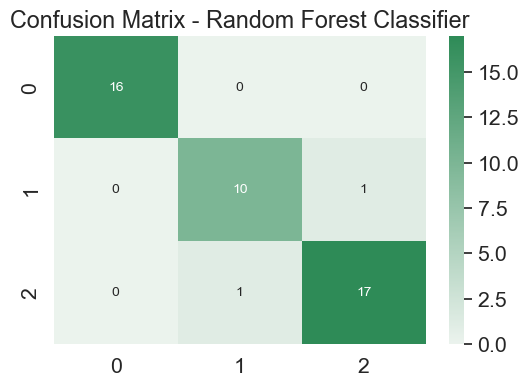

In [91]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

df_cm_rf = pd.DataFrame(cm_rf, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_rf, annot=True, annot_kws={"size": 10}, cmap = sns.light_palette("seagreen", as_cmap=True)) # font size
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

### 2.3 Accuracy of the Random forest classifier

In [92]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

accuracy_test_rf = round(accuracy_score(y_test, y_pred_rf)* 100, 2)
accuracy_train_rf = round(rf_model.score(X_train, y_train)* 100, 2)
precision_rf = round(precision_score(y_test, y_pred_rf,average = 'micro')* 100, 2)
recall_rf =  round(recall_score(y_test, y_pred_rf, average = 'micro')* 100, 2)
f1_rf = round(f1_score(y_test,y_pred_rf,average = 'micro')* 100, 2)

print("Accuracy testing: %.3f"  % accuracy_test_rf)
print("Accuracy training: %.3f" % accuracy_train_rf)
print('precision_rf : %.3f' %precision_rf)
print('recall_rf: %.3f' %recall_rf)
print('f1-score_rf : %.3f' %f1_rf)

array = np.array([accuracy_test_rf, precision_rf, recall_rf, f1_rf])
index_names = ['accuracy', 'precision', 'recall', 'f1-score']
column_name = ['Testing']
metric_table = pd.DataFrame(data = array, index  = index_names, columns = column_name)
print(metric_table.to_latex())

Accuracy testing: 95.560
Accuracy training: 100.000
precision_rf : 95.560
recall_rf: 95.560
f1-score_rf : 95.560
\begin{tabular}{lr}
\toprule
{} &  Testing \\
\midrule
accuracy  &    95.56 \\
precision &    95.56 \\
recall    &    95.56 \\
f1-score  &    95.56 \\
\bottomrule
\end{tabular}



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13928\986497519.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metric_table.to_latex())


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91      0.91      0.91        11
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# 3. Multinomial logistic Regression classifier

### 3.1 Train the model

In [94]:
from sklearn.linear_model import  LogisticRegression

# create a Logistic regresion model
lr_model = LogisticRegression(solver= 'lbfgs', max_iter=400, multi_class = 'multinomial')

# fit the model to the iris dataset
lr_model.fit(X_train, y_train)

# make predictions on test set
y_pred_lr = lr_model.predict(X_test)

### 3.2 Confusion matrix

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained Logistic Regression classifier on the testing set.

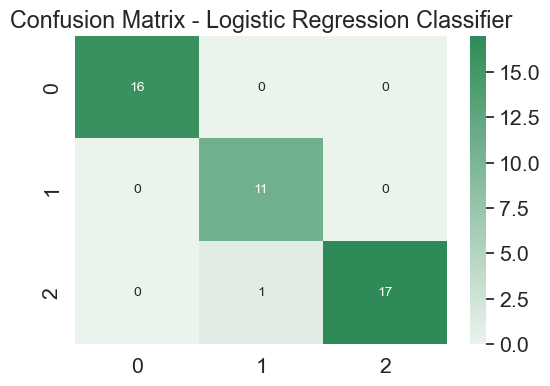

In [95]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

df_cm_lr = pd.DataFrame(cm_lr, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_lr, annot=True, annot_kws={"size": 10}, cmap = sns.light_palette("seagreen", as_cmap=True)) # font size
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()

### 3.3 Accuracy of the Logistic Regression classifier

In [96]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

accuracy_test_lr = round(accuracy_score(y_test, y_pred_lr)* 100, 2)
accuracy_train_lr = round(lr_model.score(X_train, y_train)* 100, 2)
precision_lr = round(precision_score(y_test, y_pred_lr,average = 'micro')* 100, 2)
recall_lr =  round(recall_score(y_test, y_pred_lr, average = 'micro')* 100, 2)
f1_lr = round(f1_score(y_test,y_pred_lr,average = 'micro')* 100, 2)

print("Accuracy testing: %.3f"  % accuracy_test_lr)
print("Accuracy training: %.3f" % accuracy_train_lr)
print('precision_lr : %.3f' %precision_lr)
print('recall_lr: %.3f' %recall_lr)
print('f1-score_lr : %.3f' %f1_lr)

array = np.array([accuracy_test_lr, precision_lr, recall_lr, f1_lr])
index_names = ['accuracy', 'precision', 'recall', 'f1-score']
column_name = ['Testing']
metric_table = pd.DataFrame(data = array, index  = index_names, columns = column_name)
print(metric_table.to_latex())

Accuracy testing: 97.780
Accuracy training: 95.240
precision_lr : 97.780
recall_lr: 97.780
f1-score_lr : 97.780
\begin{tabular}{lr}
\toprule
{} &  Testing \\
\midrule
accuracy  &    97.78 \\
precision &    97.78 \\
recall    &    97.78 \\
f1-score  &    97.78 \\
\bottomrule
\end{tabular}



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13928\1574457949.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metric_table.to_latex())


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# 4. Support vector machines classifier

### 4.1 Train the model

In [101]:
from sklearn.svm import SVC

# create a SVM model
svm_model = SVC(kernel = 'linear', random_state = 0)

# fit the model to the iris dataset
svm_model.fit(X_train, y_train)

# make predictions on test set
y_pred_svm = svm_model.predict(X_test)

### 4.2 Confusion matrix 

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained SVM classifier on the testing set.

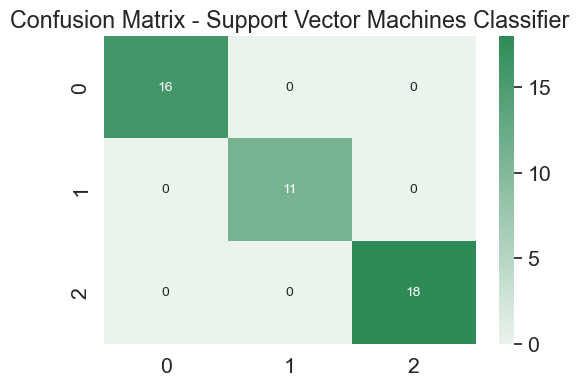

In [102]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

df_cm_svm = pd.DataFrame(cm_svm, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_svm, annot=True, annot_kws={"size": 10}, cmap = sns.light_palette("seagreen", as_cmap=True)) # font size
plt.title('Confusion Matrix - Support Vector Machines Classifier')
plt.show()

### 4.3 Accuracy of the SVM classifier

In [103]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

accuracy_test_svm = round(accuracy_score(y_test, y_pred_svm)* 100, 2)
accuracy_train_svm = round(svm_model.score(X_train, y_train)* 100, 2)
precision_svm =round( precision_score(y_test, y_pred_svm,average = 'micro')* 100, 2)
recall_svm =  round(recall_score(y_test, y_pred_svm, average = 'micro')* 100, 2)
f1_svm = round(f1_score(y_test,y_pred_svm,average = 'micro')* 100, 2)

print("Accuracy testing: %.3f"  % accuracy_test_svm)
print("Accuracy training: %.3f" % accuracy_train_svm)
print('precision_svm : %.3f' %precision_svm)
print('recall_svm: %.3f' %recall_svm)
print('f1-score_svm : %.3f' %f1_svm)

array = np.array([accuracy_test_svm, precision_svm, recall_svm, f1_svm])
index_names = ['accuracy', 'precision', 'recall', 'f1-score']
column_name = ['Testing']
metric_table = pd.DataFrame(data = array, index  = index_names, columns = column_name)
print(metric_table.to_latex())

Accuracy testing: 100.000
Accuracy training: 97.140
precision_svm : 100.000
recall_svm: 100.000
f1-score_svm : 100.000
\begin{tabular}{lr}
\toprule
{} &  Testing \\
\midrule
accuracy  &    100.0 \\
precision &    100.0 \\
recall    &    100.0 \\
f1-score  &    100.0 \\
\bottomrule
\end{tabular}



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13928\2078188383.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metric_table.to_latex())


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 5. Neural Networks classifier

### 5.1 Train the model

In [105]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# fit the model to the iris dataset
mlp_model.fit(X_train, y_train)

# make predictions on test set
y_pred_mlp = mlp_model.predict(X_test)

### 5.2 Confusion matrix 

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained Neural Networks classifier on the testing set.

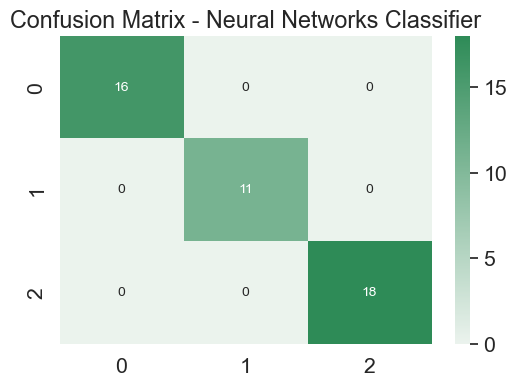

In [106]:
from sklearn.metrics import confusion_matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp

df_cm_mlp = pd.DataFrame(cm_mlp, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_mlp, annot=True, annot_kws={"size": 10}, cmap = sns.light_palette("seagreen", as_cmap=True)) # font size
plt.title('Confusion Matrix - Neural Networks Classifier')
plt.show()

### 5.3 Accuracy of the Neural Networks classifier

In [107]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

accuracy_test_mlp = round(accuracy_score(y_test, y_pred_mlp)* 100, 2)
accuracy_train_mlp = round(mlp_model.score(X_train, y_train)* 100, 2)
precision_mlp = round(precision_score(y_test, y_pred_mlp,average = 'micro')* 100, 2)
recall_mlp =  round(recall_score(y_test, y_pred_mlp, average = 'micro')* 100, 2)
f1_mlp = round(f1_score(y_test,y_pred_mlp,average = 'micro')* 100, 2)

print("Accuracy testing: %.3f"  % accuracy_test_mlp)
print("Accuracy training: %.3f" % accuracy_train_mlp)
print('precision_mlp : %.3f' %precision_mlp)
print('recall_mlp: %.3f' %recall_mlp)
print('f1-score_mlp : %.3f' %f1_mlp)

array = np.array([accuracy_test_mlp, precision_mlp, recall_mlp, f1_mlp])
index_names = ['accuracy', 'precision', 'recall', 'f1-score']
column_name = ['Testing']
metric_table = pd.DataFrame(data = array, index  = index_names, columns = column_name)
print(metric_table.to_latex())

Accuracy testing: 100.000
Accuracy training: 98.100
precision_mlp : 100.000
recall_mlp: 100.000
f1-score_mlp : 100.000
\begin{tabular}{lr}
\toprule
{} &  Testing \\
\midrule
accuracy  &    100.0 \\
precision &    100.0 \\
recall    &    100.0 \\
f1-score  &    100.0 \\
\bottomrule
\end{tabular}



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13928\1061782586.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metric_table.to_latex())


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 6. K-Nearest Neighbors classifier

### 6.1 Train the model

In [109]:
from sklearn.neighbors import KNeighborsClassifier

# create a KNN model
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

# fit the model to the iris dataset
knn_model.fit(X_train, y_train)

# make predictions on test set
y_pred_knn = knn_model.predict(X_test)

### 6.2 Confusion matrix 

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained KNN classifier on the testing set.

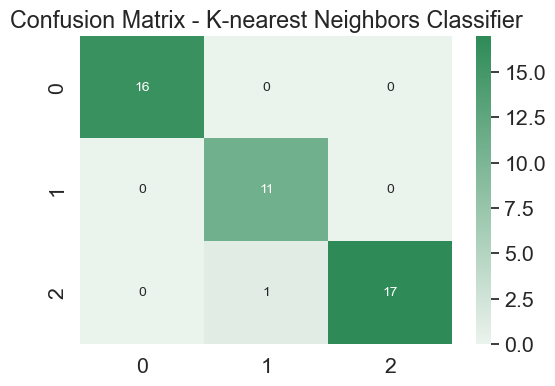

In [110]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

df_cm_knn = pd.DataFrame(cm_knn, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_knn, annot=True, annot_kws={"size": 10}, cmap = sns.light_palette("seagreen", as_cmap=True)) # font size
plt.title('Confusion Matrix - K-nearest Neighbors Classifier')
plt.show()

### 6.3 Accuracy of the KNN classifier

In [111]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

accuracy_test_knn = round(accuracy_score(y_test, y_pred_knn)* 100, 2)
accuracy_train_knn = round(knn_model.score(X_train, y_train)* 100, 2)
precision_knn = round(precision_score(y_test, y_pred_knn,average = 'micro')* 100, 2)
recall_knn =  round(recall_score(y_test, y_pred_knn, average = 'micro')* 100, 2)
f1_knn = round(f1_score(y_test,y_pred_knn,average = 'micro')* 100, 2)

print("Accuracy testing: %.3f"  % accuracy_test_knn)
print("Accuracy training: %.3f" % accuracy_train_knn)
print('precision_knn : %.3f' %precision_knn)
print('recall_knn: %.3f' %recall_knn)
print('f1-score_knn : %.3f' %f1_knn)

array = np.array([accuracy_test_knn, precision_knn, recall_knn, f1_knn])
index_names = ['accuracy', 'precision', 'recall', 'f1-score']
column_name = ['Testing']
metric_table = pd.DataFrame(data = array, index  = index_names, columns = column_name)
print(metric_table.to_latex())

Accuracy testing: 97.780
Accuracy training: 100.000
precision_knn : 97.780
recall_knn: 97.780
f1-score_knn : 97.780
\begin{tabular}{lr}
\toprule
{} &  Testing \\
\midrule
accuracy  &    97.78 \\
precision &    97.78 \\
recall    &    97.78 \\
f1-score  &    97.78 \\
\bottomrule
\end{tabular}



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13928\1767611615.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metric_table.to_latex())


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# 7. XGBoost classifier

### 7.1 Train the model

In [113]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# fit the model to the iris dataset
xgb_model.fit(X_train, y_train)

# make predictions on test set
y_pred_xgb = xgb_model.predict(X_test)

  Using cached xgboost-1.7.4-py3-none-win_amd64.whl (89.1 MB)


### 7.2 Confusion matrix 

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained XGBoost classifier on the testing set.

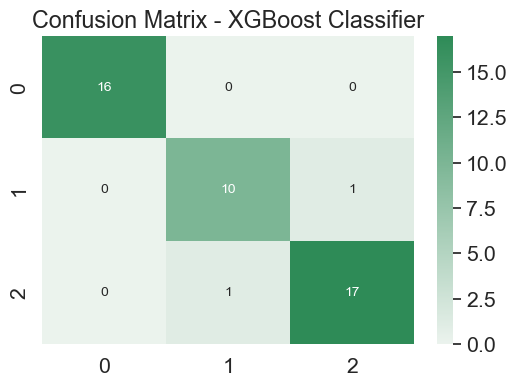

In [118]:
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb

df_cm_xgb = pd.DataFrame(cm_xgb, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_xgb, annot=True, annot_kws={"size": 10}, cmap = sns.light_palette("seagreen", as_cmap=True)) # font size
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

### 7.3 Accuracy of the XGBoost classifier

In [119]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

accuracy_test_xgb = round(accuracy_score(y_test, y_pred_xgb)* 100, 2)
accuracy_train_xgb = round(knn_model.score(X_train, y_train)* 100, 2)
precision_xgb = round(precision_score(y_test, y_pred_xgb,average = 'micro')* 100, 2)
recall_xgb =  round(recall_score(y_test, y_pred_xgb, average = 'micro')* 100, 2)
f1_xgb = round(f1_score(y_test,y_pred_xgb,average = 'micro')* 100, 2)

print("Accuracy testing: %.3f"  % accuracy_test_xgb)
print("Accuracy training: %.3f" % accuracy_train_xgb)
print('precision_xgb : %.3f' %precision_xgb)
print('recall_xgb: %.3f' %recall_xgb)
print('f1-score_xgb : %.3f' %f1_xgb)

array = np.array([accuracy_test_xgb, precision_xgb, recall_xgb, f1_xgb])
index_names = ['accuracy', 'precision', 'recall', 'f1-score']
column_name = ['Testing']
metric_table = pd.DataFrame(data = array, index  = index_names, columns = column_name)
print(metric_table.to_latex())

Accuracy testing: 95.560
Accuracy training: 100.000
precision_xgb : 95.560
recall_xgb: 95.560
f1-score_xgb : 95.560
\begin{tabular}{lr}
\toprule
{} &  Testing \\
\midrule
accuracy  &    95.56 \\
precision &    95.56 \\
recall    &    95.56 \\
f1-score  &    95.56 \\
\bottomrule
\end{tabular}



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13928\1330014426.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metric_table.to_latex())


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91      0.91      0.91        11
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

